In [9]:
from PIL import Image, ImageFilter
import numpy as np
from skimage.transform import resize, rescale
from scipy.ndimage import gaussian_filter

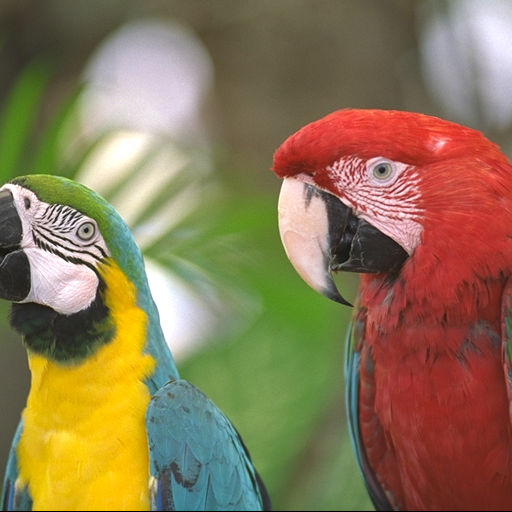

In [4]:
img = Image.open('/Users/hallpaz/Workspace/impa/phd-thesis/data/img/two_macaws.png')
img

In [12]:
levels = 5
tower = [img]
while len(tower) < levels:
    sigma = 2**(len(tower)-1) * 2 / 3
    tower.append(tower[-1].filter(ImageFilter.GaussianBlur(sigma)))
        

In [13]:
Image.fromarray(np.hstack([np.array(f) for f in tower])).save('compil.png')

In [15]:
pyramid = [tower[0]]
for i in range(1, len(tower)):
    current = tower[i]
    size = current.size
    pyramid.append(current.resize((size[0] // 2**i, size[1] // 2**i)))

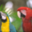

In [16]:
pyramid[-1]

In [5]:
arr_img = np.array(img, np.float32)
arr_img.shape

(512, 512, 3)

In [6]:
levels = 5
tower = [arr_img]
while len(tower) < levels:
    sigma = 2**(len(tower)-1) * 2 / 3
    tower.append(
        gaussian_filter(tower[-1], (sigma, sigma, 1) , mode='constant')
        )

In [7]:
hop = np.hstack([img.astype(np.uint8) for img in tower])
Image.fromarray(hop).save("exp3.png")

In [6]:
pyramid = [arr_img]
for i, img in enumerate(tower[1:], start=1):
    pyramid.append(rescale(img, 1 / (2**i), anti_aliasing=False))


In [7]:
len(pyramid)

5

In [9]:
Image.fromarray(pyramid[-1].astype(np.uint8)).save("tosco.png")

In [ ]:
base_signal = ImageSignal.init_fromfile(
                        hyper['data_path'],
                        domain=hyper['domain'],
                        channels=hyper['channels'],
                        sampling_scheme=hyper['sampling_scheme'],
                        width=hyper['width'], height=hyper['height'],
                        batch_size=hyper['batch_size'],
                        color_space=hyper['color_space'])

In [ ]:
def create_MR_strutures(base_signal, max_stages, 
                       decimation, pmode='constant', 
                       filter='gaussian', sigma=2/3):
    tower = [base_signal]
    while len(tower) < max_stages:
        tower.append(
            gaussian_filter(tower[-1], 2**(len(tower)-1) * sigma, mode=pmode)
        )
    if decimation:
        pyramid = [tower[0]]
        for i, signal in enumerate(tower[1:], start=1):
            pyramid.append(rescale(signal, 1 / (2**i), anti_aliasing=False))
        return pyramid, tower
    return tower, tower

In [20]:
from scipy import misc

In [21]:
misc.face().shape

C:\Users\hallpaz\AppData\Local\Temp\ipykernel_4404\498508099.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  misc.face().shape


(768, 1024, 3)